 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [47]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [48]:
## Whale Returns

##Read the Whale Portfolio daily returns and clean the data

In [49]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# Sorting the csv file
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [50]:
# Count nulls
print(whale_returns.isnull().sum())


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [51]:
# Drop nulls
whale_returns.dropna(inplace = True)
#null count after drop
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [52]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)

# Sorting algorithmic returns
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(15)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [53]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [54]:
# Drop nulls
algo_returns.dropna(inplace = True)

# Count nulls after drop
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [55]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)

#Sort S&P 500 Closing prices
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [56]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [57]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace('$','').astype("float")



In [58]:
# Sort data in S&P 500
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [60]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
print(sp500_daily_returns)

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [62]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [65]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)
print(sp500_daily_returns)

sp500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [68]:
# Concatenate all DataFrames into a single DataFrame
# Daily Difference = daily_diff
daily_diff = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = "columns", join = "inner")

daily_diff.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

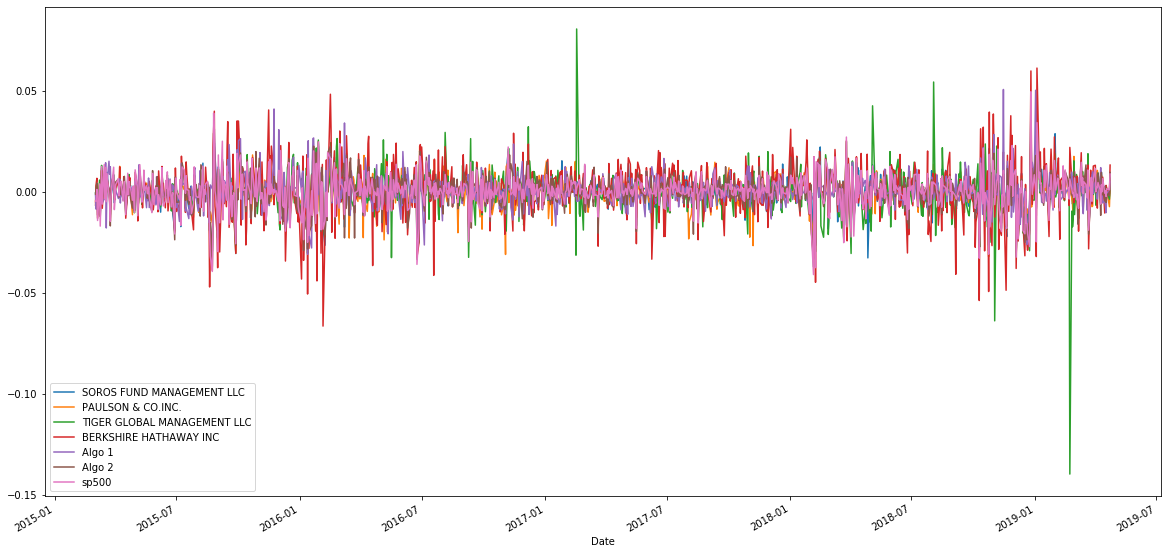

In [69]:
# Plot daily returns
daily_diff.plot(figsize = (20,10))

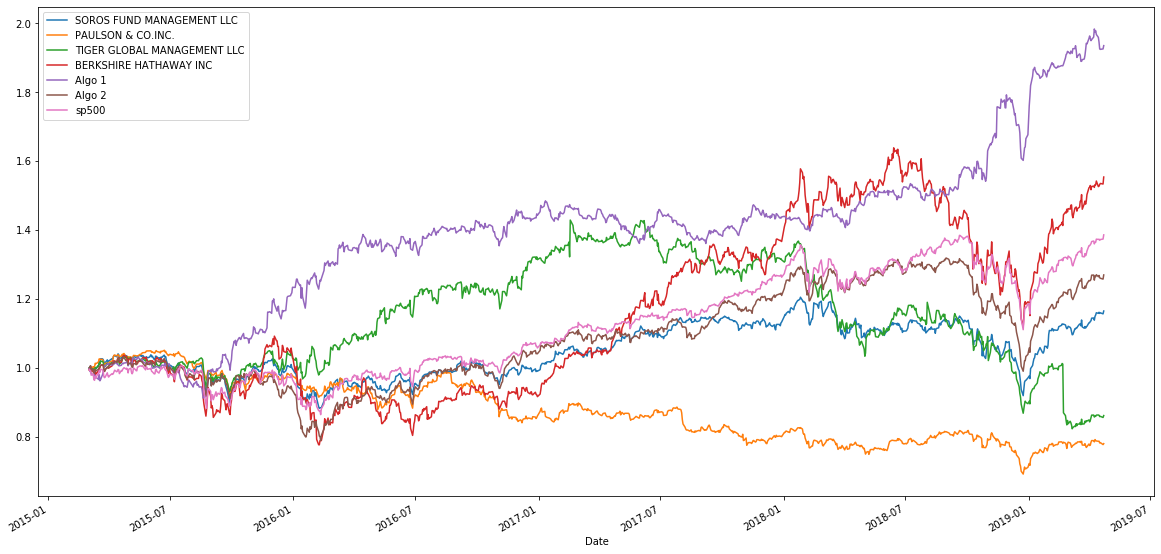

In [70]:
# Plot cumulative returns
# Daily Difference Cumulative = daily_cum
daily_cum = (1 + daily_diff).cumprod()
daily_cum.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

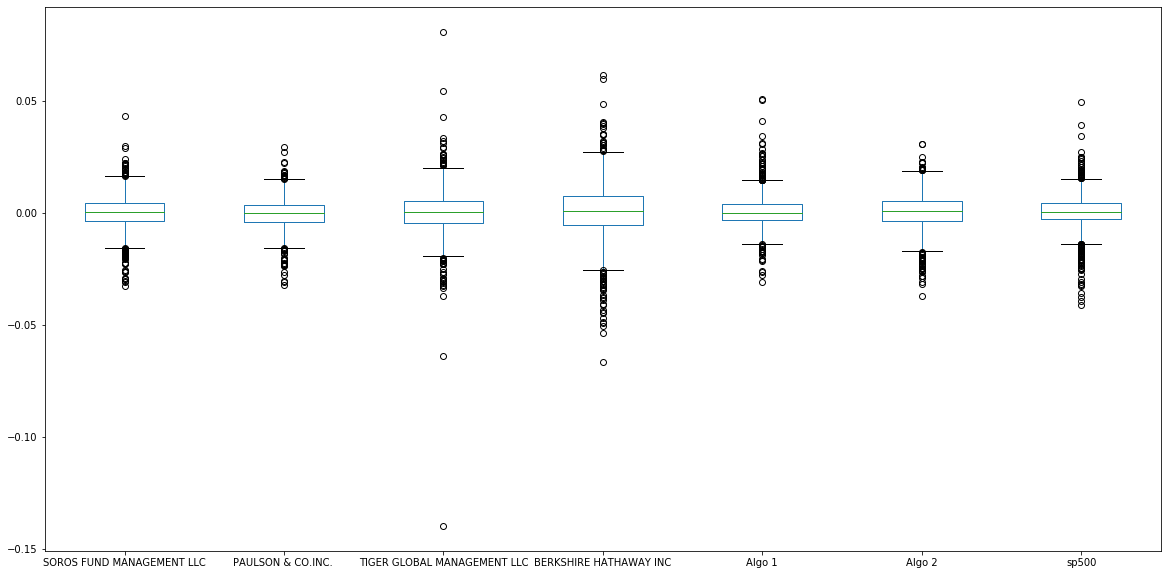

In [71]:
# Box plot to visually show risk
daily_diff.plot(kind = "box", figsize = (20,10))

In [74]:
# Daily Standard Deviations
# Daily Standard Deviations = daily_std

# Calculate the standard deviation for each portfolio. 
daily_std = pd.DataFrame(daily_diff.std()).rename(columns = {0:"std"})
daily_std
# Which portfolios are riskier than the S&P 500?
#see next code line for higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [75]:
# Determine which portfolios are riskier than the S&P 500
higher_std = daily_std[daily_std["std"] > daily_std.loc["sp500", "std"]]
higher_std

# Tiger and BHI have higher volitility than SP500

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [76]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized standard deviation = annualized_std
annualized_std = daily_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

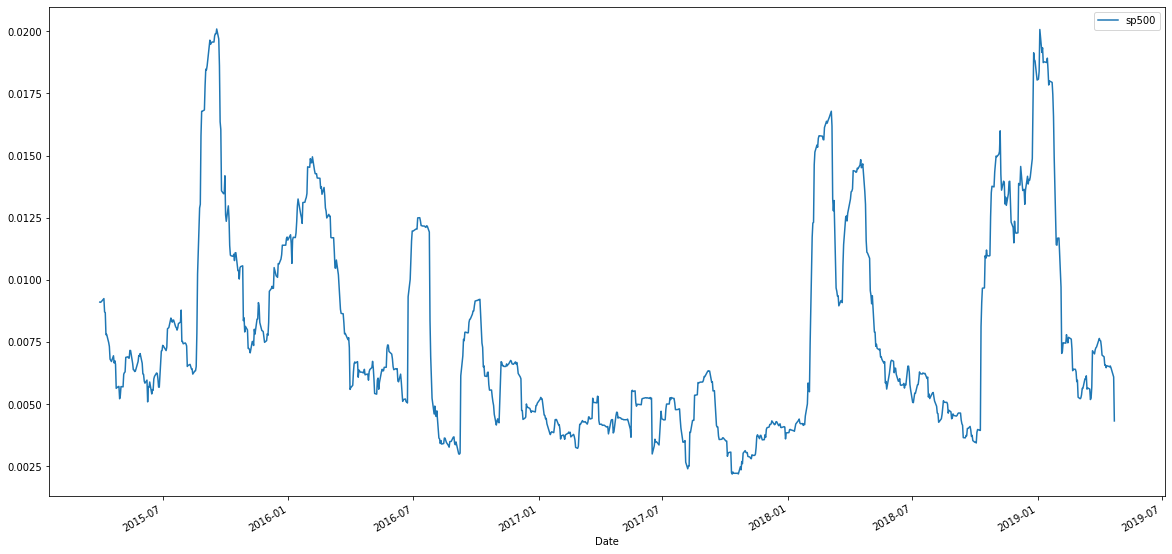

In [78]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# sp500 rolling 21 SD = sp500_rolling21
sp500_rolling21 = daily_diff[["sp500"]].rolling(window = 21).std()
sp500_rolling21.plot(figsize = (20,10))

In [82]:
# Construct a correlation table
correlation_sp500 = pd.DataFrame(daily_diff.corr()).loc[:, "sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500 < 1].max()]


Algo 2    0.858764
Name: sp500, dtype: float64

In [84]:
correlation_sp500.head()

# Algo 2 best mimic SP500 since it has the best correlation to SP 500, as visullized in the chart below 



SOROS FUND MANAGEMENT LLC      0.837864
PAULSON & CO.INC.              0.669732
TIGER GLOBAL MANAGEMENT LLC    0.623946
BERKSHIRE HATHAWAY INC         0.751371
Algo 1                         0.279494
Name: sp500, dtype: float64

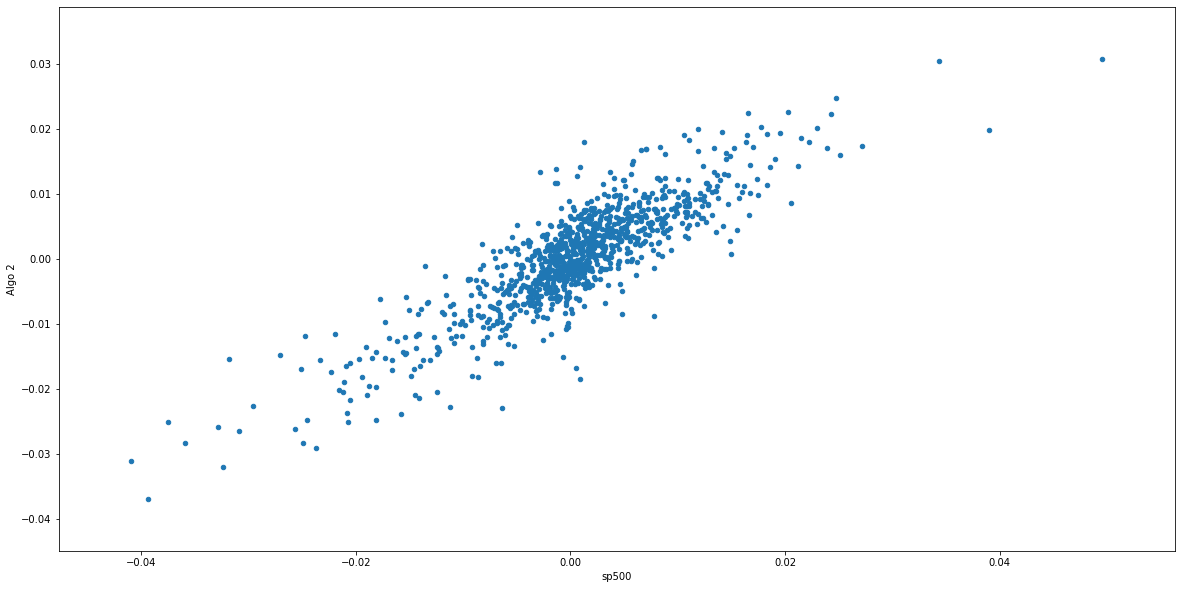

In [87]:
daily_diff.plot(kind = "scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

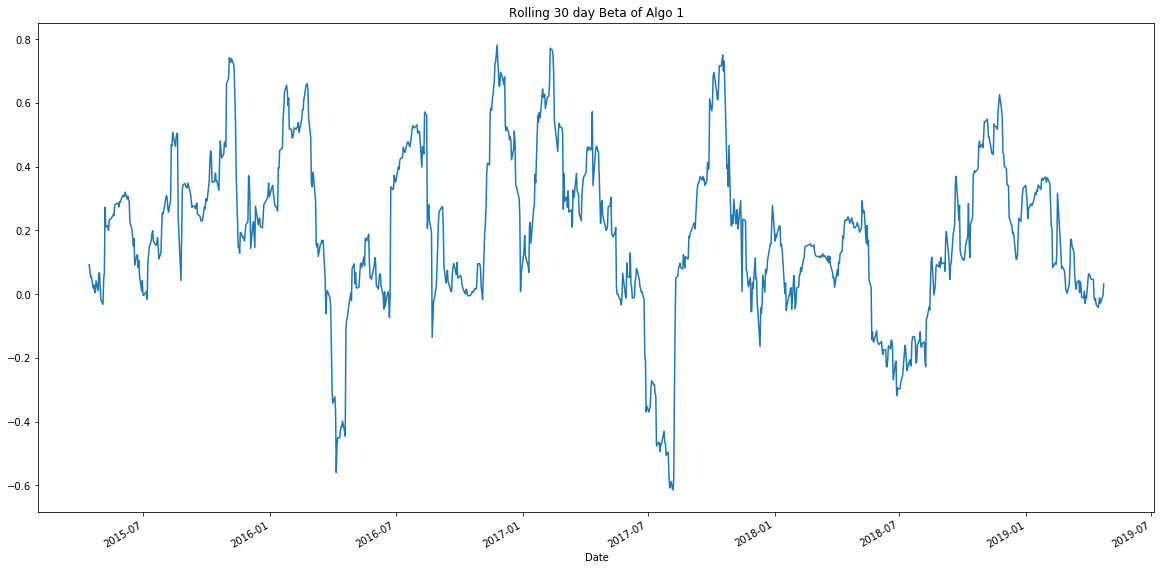

In [98]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = daily_diff["Algo 1"].rolling(window=30).cov(daily_diff["sp500"])
rolling_variance = daily_diff["sp500"].rolling(window = 30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize = (20,10), title = "Rolling 30 day Beta of Algo 1")

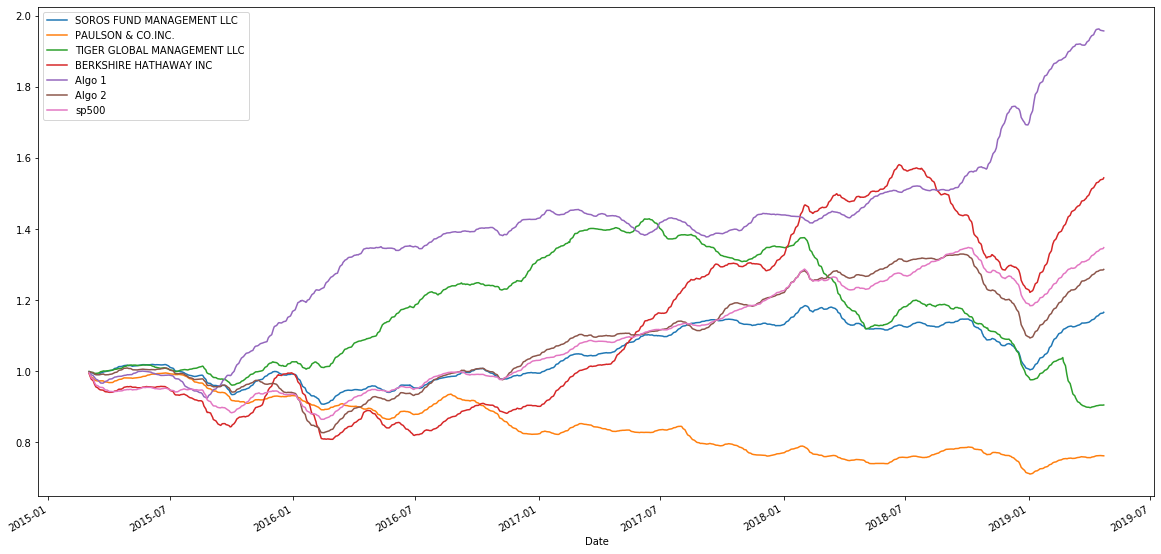

In [96]:
# Calculate a rolling window using the exponentially weighted moving average. 
daily_diff_ewm = daily_diff.ewm(span = 21, adjust = False).mean()
(1+daily_diff_ewm).cumprod().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [99]:
# Calculate annualized Sharpe Ratios
shape_ratios = daily_diff.mean()*252 / (daily_diff.std()*np.sqrt(252))
shape_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

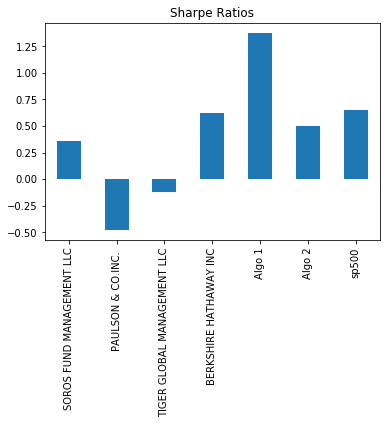

In [100]:
# Visualize the sharpe ratios as a bar plot
shape_ratios.plot(kind = "bar", title = "Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

# Answer:

## Algo 1 outperformed the market and the whales, while Algo 2 fell below the SP500 market and the Berkshire Hathaway Inc.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [105]:
# Read the first stock
apple_2019 = pd.read_csv(Path("Resources/aapl_2019.csv"), index_col = "Date", parse_dates = True, infer_datetime_format = True)
apple_2019.rename(columns = {"Close": "aapl"}, inplace = True)
apple_2019.head()

,aapl
Date,
2019-01-02 16:00:00,157.92
2019-01-03 16:00:00,142.19
2019-01-04 16:00:00,148.26
2019-01-07 16:00:00,147.93
2019-01-08 16:00:00,150.75


In [106]:
# Read the second stock
google_2019 = pd.read_csv(Path("Resources/google_2019.csv"), index_col = "Date", parse_dates = True, infer_datetime_format = True)
google_2019.rename(columns = {"Close": "goog"}, inplace = True)
google_2019.head()

,goog
Date,
2019-01-02 16:00:00,1045.85
2019-01-03 16:00:00,1016.06
2019-01-04 16:00:00,1070.71
2019-01-07 16:00:00,1068.39
2019-01-08 16:00:00,1076.28


In [107]:
# Read the third stock
otex_2019 = pd.read_csv(Path("Resources/otex_2019.csv"), index_col = "Date", parse_dates = True, infer_datetime_format = True)
otex_2019.rename(columns = {"Close": "otex"}, inplace = True)
otex_2019.head()

,otex
Date,
2019-01-02 16:00:00,32.43
2019-01-03 16:00:00,31.45
2019-01-04 16:00:00,32.21
2019-01-07 16:00:00,32.76
2019-01-08 16:00:00,33.71


In [108]:
# Concatenate all stocks into a single DataFrame
aja_stocks = pd.concat((apple_2019, google_2019, otex_2019), axis = 1, join = "inner")
aja_stocks.sort_index(ascending = True, inplace = True)
aja_stocks.head()

,aapl,goog,otex
Date,,,
2019-01-02 16:00:00,157.92,1045.85,32.43
2019-01-03 16:00:00,142.19,1016.06,31.45
2019-01-04 16:00:00,148.26,1070.71,32.21
2019-01-07 16:00:00,147.93,1068.39,32.76
2019-01-08 16:00:00,150.75,1076.28,33.71


In [110]:
# Reset the index
aja_stocks.index = aja_stocks.index.normalize()
aja_stocks.head()

,aapl,goog,otex
Date,,,
2019-01-02,157.92,1045.85,32.43
2019-01-03,142.19,1016.06,31.45
2019-01-04,148.26,1070.71,32.21
2019-01-07,147.93,1068.39,32.76
2019-01-08,150.75,1076.28,33.71


In [118]:
# Pivot so that each column of prices represents a unique symbol
aja_stocks_pivot = pd.DataFrame(aja_stocks)
aja_stocks_pivot

,aapl,goog,otex
Date,,,
2019-01-02,157.92,1045.85,32.43
2019-01-03,142.19,1016.06,31.45
2019-01-04,148.26,1070.71,32.21
2019-01-07,147.93,1068.39,32.76
2019-01-08,150.75,1076.28,33.71
...,...,...,...
2019-12-23,284.00,1348.84,44.04
2019-12-24,284.27,1343.56,43.69
2019-12-26,289.91,1360.40,44.06


In [119]:
# Drop Nulls
aja_stocks.dropna(inplace = True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [120]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
aja_portfolio = aja_stocks.dot(weights)
aja_portfolio_returns = aja_portfolio.pct_change()
aja_portfolio_returns.dropna(inplace = True)
aja_portfolio_returns.head()

Date
2019-01-03   -0.037615
2019-01-04    0.051677
2019-01-07   -0.001678
2019-01-08    0.009335
2019-01-09    0.001118
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [121]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_returns = pd.concat((aja_portfolio_returns,daily_diff), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"aja_portfolio"}, inplace = True)
portfolio_returns

,aja_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2019-01-03,-0.037615,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757
2019-01-04,0.051677,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,-0.001678,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,0.009335,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,0.001118,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
...,...,...,...,...,...,...,...,...
2019-04-16,0.004215,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.008484,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000535,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [122]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace = True)
portfolio_returns

,aja_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2019-01-03,-0.037615,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757
2019-01-04,0.051677,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336
2019-01-07,-0.001678,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010
2019-01-08,0.009335,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695
2019-01-09,0.001118,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098
...,...,...,...,...,...,...,...,...
2019-04-16,0.004215,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.008484,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000535,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [124]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
aja_portfolio,0.013500
SOROS FUND MANAGEMENT LLC,0.007471
PAULSON & CO.INC.,0.006958
TIGER GLOBAL MANAGEMENT LLC,0.018262
BERKSHIRE HATHAWAY INC,0.012868
Algo 1,0.005730
Algo 2,0.007657
sp500,0.007886


In [125]:
# higher
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std

,std
aja_portfolio,0.013500
TIGER GLOBAL MANAGEMENT LLC,0.018262
BERKSHIRE HATHAWAY INC,0.012868


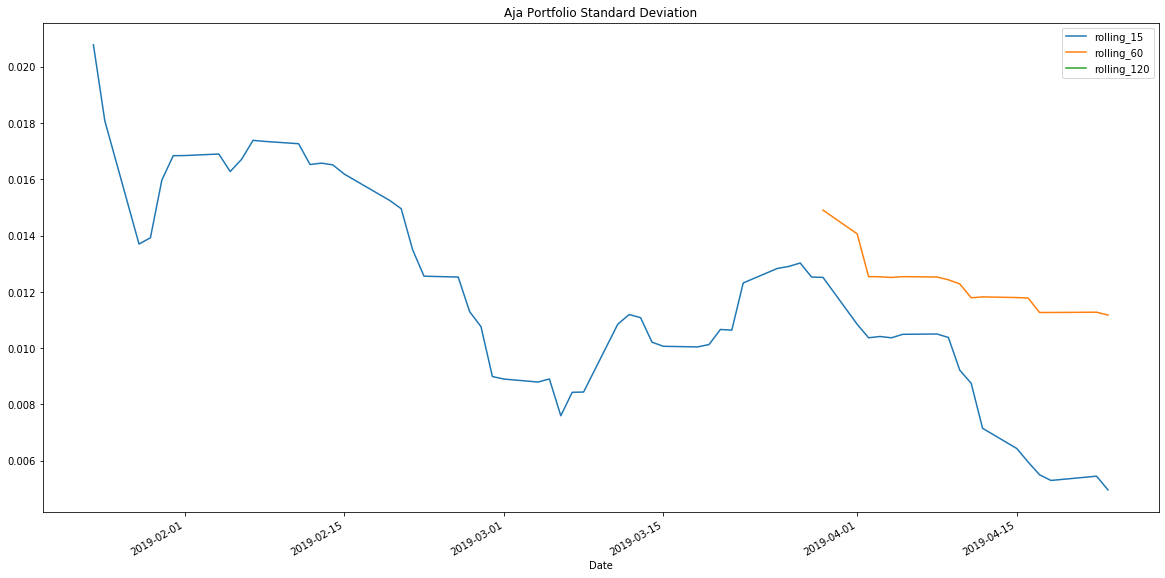

In [128]:
# rolling
aja_portfolio_rolling_15 = portfolio_returns[["aja_portfolio"]].rolling(window = 15).std()
aja_portfolio_rolling_60 = portfolio_returns[["aja_portfolio"]].rolling(window = 60).std()
aja_portfolio_rolling_90 = portfolio_returns[["aja_portfolio"]].rolling(window = 90).std()
ax = aja_portfolio_rolling_15.plot(figsize = (20,10), title = "Aja Portfolio Standard Deviation")
aja_portfolio_rolling_60.plot(ax = ax)
aja_portfolio_rolling_90.plot(ax = ax)
ax.legend(["rolling_15", "rolling_60", "rolling_120"])

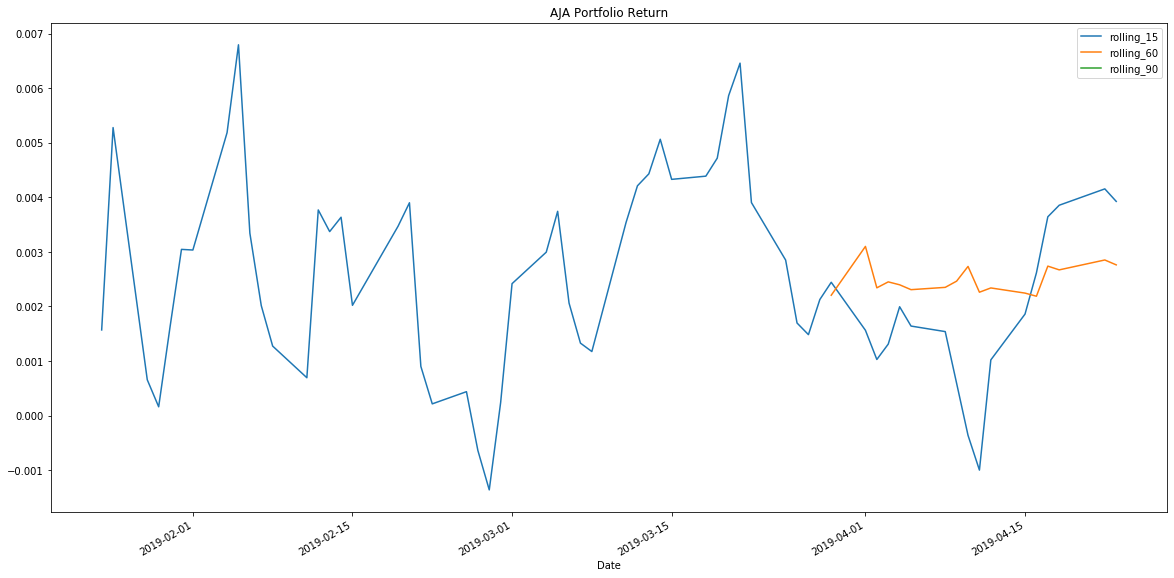

In [156]:
aja_portfolio_rolling_15_return = portfolio_returns[["aja_portfolio"]].rolling(window = 15).mean()
aja_portfolio_rolling_60_return = portfolio_returns[["aja_portfolio"]].rolling(window = 60).mean()
aja_portfolio_rolling_90_return = portfolio_returns[["aja_portfolio"]].rolling(window = 90).mean()
ax = aja_portfolio_rolling_15_return.plot(figsize = (20,10), title = "AJA Portfolio Return")
aja_portfolio_rolling_60_return.plot(ax = ax)
aja_portfolio_rolling_90_return.plot(ax = ax)
ax.legend(["rolling_15", "rolling_60", "rolling_90"])

In [159]:
# Annualized Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

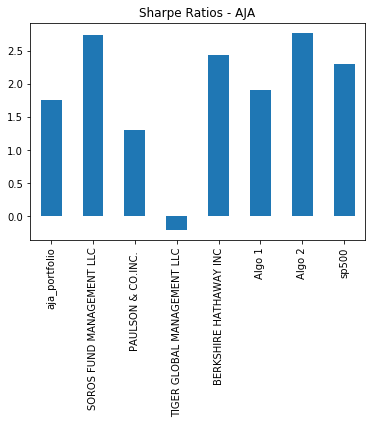

In [160]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios - AJA")

In [162]:
# Create a correlation analysis
correlation_aja_portfolio = portfolio_returns.corr().loc[:, "aja_portfolio"]
correlation_aja_portfolio[correlation_aja_portfolio == correlation_aja_portfolio[correlation_aja_portfolio < 1].max()]

sp500    0.814016
Name: aja_portfolio, dtype: float64

In [ ]:
# my portfolio is correlated to SP 500

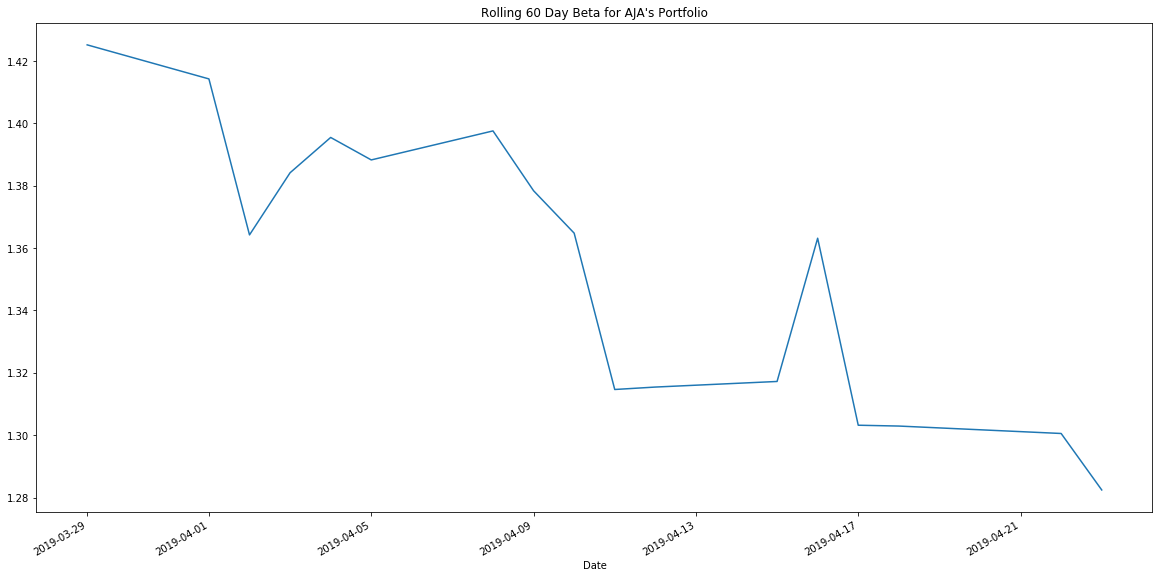

In [163]:
# Beta
rolling_covariance = portfolio_returns["aja_portfolio"].rolling(window = 60).cov(portfolio_returns["sp500"])
rolling_variance = portfolio_returns["sp500"].rolling(window = 60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize = (20, 10), title = "Rolling 60 Day Beta for AJA's Portfolio")